# Quick Draw dataset - Data analysis and preprocessing

In [13]:
import shutil

In [14]:
import numpy as np
import os
import errno
from PIL import Image 

In [15]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
import pickle 
import requests 
from io import BytesIO 
from sklearn.model_selection import train_test_split 
from skimage.feature import canny 

In [17]:
train_path = "datasets/data/train_set/"
test_path = "datasets/data/test_set/"

data_file_path = "datasets/data/numpy_bitmap"

In [19]:
classes = ['star', 'apple', 'fish', 'moon', 'ice cream', 'tent', 'candle', 'fork', 'crab',
          'cake', 'hammer', 'sun', 'diamond', 'table', 'light bulb', 'spider', 'face', 'eye',
          'crown', 'shorts']
    
#for filename in os.listdir("datasets/data/test_set"):
#    classes.append(os.path.splitext(filename)[0])

In [20]:
classes

['star',
 'apple',
 'fish',
 'moon',
 'ice cream',
 'tent',
 'candle',
 'fork',
 'crab',
 'cake',
 'hammer',
 'sun',
 'diamond',
 'table',
 'light bulb',
 'spider',
 'face',
 'eye',
 'crown',
 'shorts']

In [21]:
# dictionary with label codes

def Convert(lst): 
    res_dct = {i: lst[i] for i in range(0, len(lst))} 
    return res_dct 
          
# Driver code 
print(Convert(classes))

{0: 'star', 1: 'apple', 2: 'fish', 3: 'moon', 4: 'ice cream', 5: 'tent', 6: 'candle', 7: 'fork', 8: 'crab', 9: 'cake', 10: 'hammer', 11: 'sun', 12: 'diamond', 13: 'table', 14: 'light bulb', 15: 'spider', 16: 'face', 17: 'eye', 18: 'crown', 19: 'shorts'}


In [22]:
# Grabbing quick draw npy files
URL_DATA = {}
for category in classes:
    URL_DATA[category] = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' + category +'.npy'

In [23]:
%%time

# download dataset with loop into dictionary
classes_dict = {}
for key, value in URL_DATA.items():
    response = requests.get(value)
    classes_dict[key] = np.load(BytesIO(response.content))

Wall time: 10min 4s


In [24]:
%%time

# Adding class labels
for i, (key, value) in enumerate(classes_dict.items()):
    value = value.astype('float32')/255.
    if i == 0:
        classes_dict[key] = np.c_[value, np.zeros(len(value))]
    else:
        classes_dict[key] = np.c_[value,i*np.ones(len(value))]

Wall time: 31.3 s


In [25]:
%%time

lst = []
for key, value in classes_dict.items():
    lst.append(value[:10000])
    doodles = np.concatenate(lst)

In [26]:
# Split the data into features and class labels
y = doodles[:,-1].astype('float32')
X = doodles[:,:784]

# Split each dataset into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

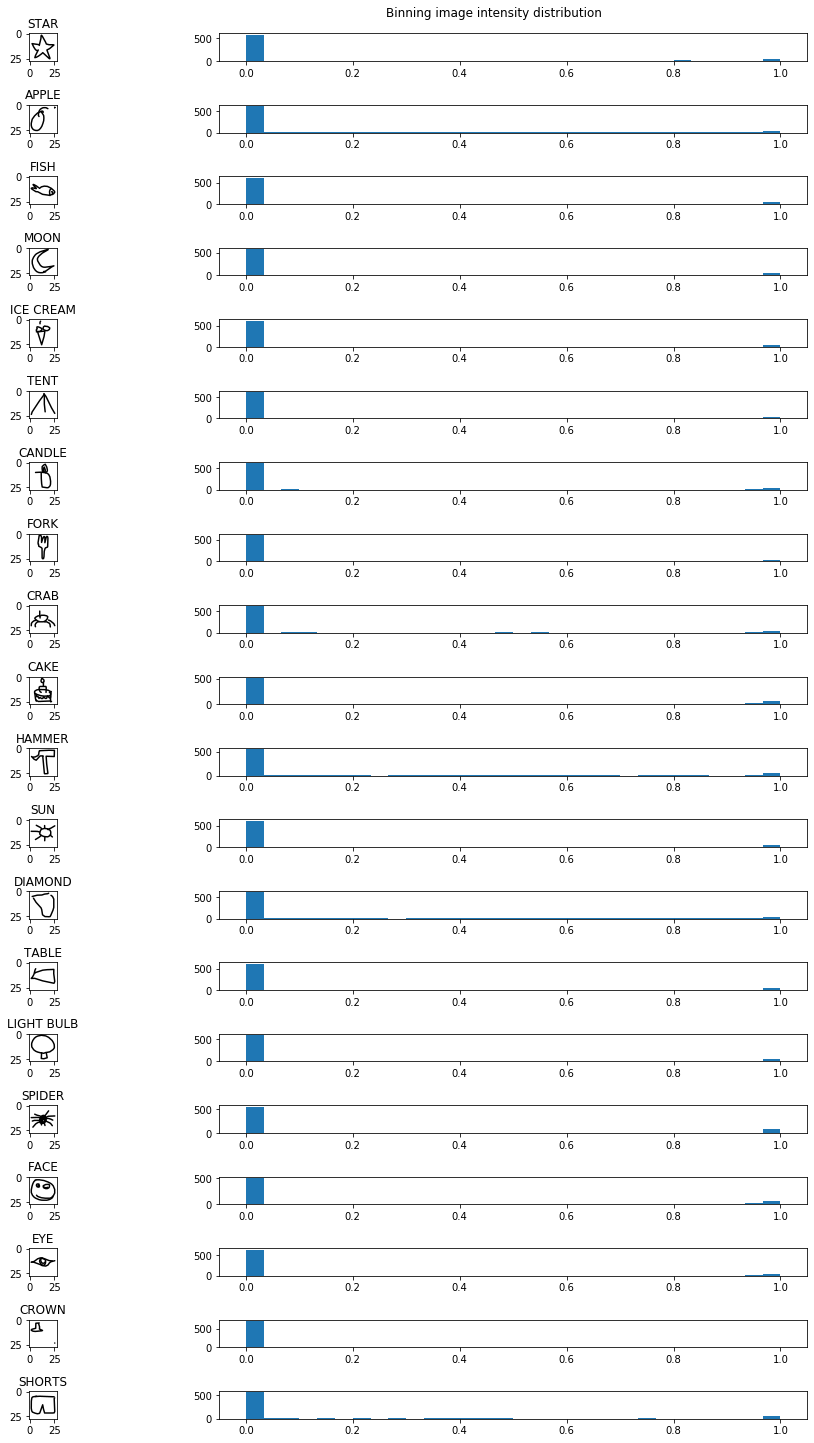

In [46]:
# Image Intensity Histrogram for each class

fig, axs = plt.subplots(20, 2, figsize=(15,20))
plt.suptitle('Binning image intensity distribution', x=.7,y=1)
for i, (key,value) in enumerate(classes_dict.items()):
    axs[i,0].set_title(key.upper())
    axs[i,0].imshow(value[0,:784].reshape((28,28)), cmap="gray_r")
    axs[i,1].hist(value[0,:784].reshape((28,28)).flatten(), bins=30,)
plt.tight_layout()

In [44]:
# Test set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 2027,
 1.0: 2062,
 2.0: 2081,
 3.0: 2051,
 4.0: 2000,
 5.0: 2075,
 6.0: 1974,
 7.0: 2012,
 8.0: 1984,
 9.0: 1946,
 10.0: 2034,
 11.0: 1966,
 12.0: 1967,
 13.0: 1997,
 14.0: 1921,
 15.0: 1993,
 16.0: 1984,
 17.0: 1901,
 18.0: 2010,
 19.0: 2015}

In [45]:
# Save X_train dataset as a pickle file
with open('xtrain.pickle', 'wb') as f:
    pickle.dump(X_train, f)
    
# Save X_test dataset as a pickle file
with open('xtest.pickle', 'wb') as f:
    pickle.dump(X_test, f)
    
# Save y_train dataset as a pickle file
with open('ytrain.pickle', 'wb') as f:
    pickle.dump(y_train, f)
    
# Save y_test dataset as a pickle file
with open('ytest.pickle', 'wb') as f:
    pickle.dump(y_test, f)